In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn import metrics 
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


#import xgboost as xbg
#import lightgbm as lbm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier


                
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

In [3]:
train.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


<Axes: xlabel='Attrition', ylabel='count'>

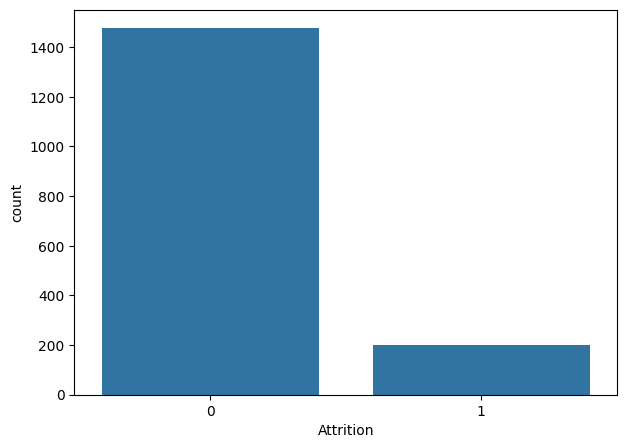

In [13]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(ax=ax, data=train, x='Attrition')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [10]:
train.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,...,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,...,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,...,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [11]:
#inspecting the train's rows and columns

train.shape
print(f"The train set has {train.shape[0]} rows and {train.shape[1]} columns")# \nWith {numerical.shape[1]} features being Numerical and {categorical.shape[1]} features being Categorical.")

The train set has 1677 rows and 35 columns


In [12]:
#looking out for potential missing values

train.isnull().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [13]:
#train.duplicated().sum()
train.duplicated().sum()

0

In [14]:
# dropping columns with irrelevant information

train = train.drop(["id", "EmployeeCount", "Over18", "StandardHours"], axis=1)

In [15]:
categorical = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
                       'MaritalStatus', 'OverTime']

numerical   = ['Age', 'DailyRate', 'DistanceFromHome', 'Education',
                       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
                       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
                       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']

In [39]:
nums = train[numerical].corr()
nums

,Age,DailyRate,DistanceFromHome,Education,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,0.039686,-0.049025,0.223545,0.030628,0.002101,0.479015,-0.009273,0.470758,0.010959,...,0.056115,0.064863,0.648047,0.014303,0.034138,0.306628,0.219880,0.204357,0.201601,-0.161044
DailyRate,0.039686,1.000000,0.024168,-0.007035,-0.001213,-0.026725,0.041369,-0.037459,0.027375,-0.013332,...,0.001315,0.021273,0.058044,-0.023140,0.025152,0.066057,0.057011,0.037035,0.040969,-0.022380
DistanceFromHome,-0.049025,0.024168,1.000000,-0.011436,0.006191,0.010035,-0.051008,0.026309,-0.061019,0.020542,...,-0.011868,0.039086,-0.033573,-0.000239,-0.017184,-0.023564,-0.006670,-0.004215,0.013749,0.024741
Education,0.223545,-0.007035,-0.011436,1.000000,0.014862,0.052390,0.085823,-0.030686,0.081054,0.007133,...,-0.005253,0.041722,0.153291,-0.011924,-0.009697,0.116723,0.094065,0.050483,0.109573,-0.084305
HourlyRate,0.030628,-0.001213,0.006191,0.014862,1.000000,-0.001867,-0.019059,-0.024347,-0.015572,-0.018454,...,-0.035430,0.058745,-0.024953,0.039878,0.016693,-0.062826,-0.063928,-0.063522,-0.074527,-0.037280
JobInvolvement,0.002101,-0.026725,0.010035,0.052390,-0.001867,1.000000,0.003865,0.035129,0.001476,-0.009055,...,0.014666,0.028960,0.001896,-0.018822,0.008476,-0.003354,0.007081,0.015706,0.009519,-0.139929
JobLevel,0.479015,0.041369,-0.051008,0.085823,-0.019059,0.003865,1.000000,-0.022297,0.909961,0.036769,...,0.020189,0.019602,0.762163,-0.029599,0.014067,0.528175,0.401296,0.382727,0.400732,-0.137238
JobSatisfaction,-0.009273,-0.037459,0.026309,-0.030686,-0.024347,0.035129,-0.022297,1.000000,-0.024722,-0.011343,...,0.016251,0.010442,-0.033450,0.016980,-0.001117,-0.010760,-0.023463,0.000448,-0.025521,-0.061010
MonthlyIncome,0.470758,0.027375,-0.061019,0.081054,-0.015572,0.001476,0.909961,-0.024722,1.000000,0.041587,...,0.024750,0.016397,0.740914,-0.030449,0.004926,0.534779,0.390755,0.380748,0.388551,-0.126896
MonthlyRate,0.010959,-0.013332,0.020542,0.007133,-0.018454,-0.009055,0.036769,-0.011343,0.041587,1.000000,...,0.005118,-0.031242,0.013895,0.027302,0.006030,0.043030,0.044616,0.022270,0.008855,-0.005484


<Axes: >

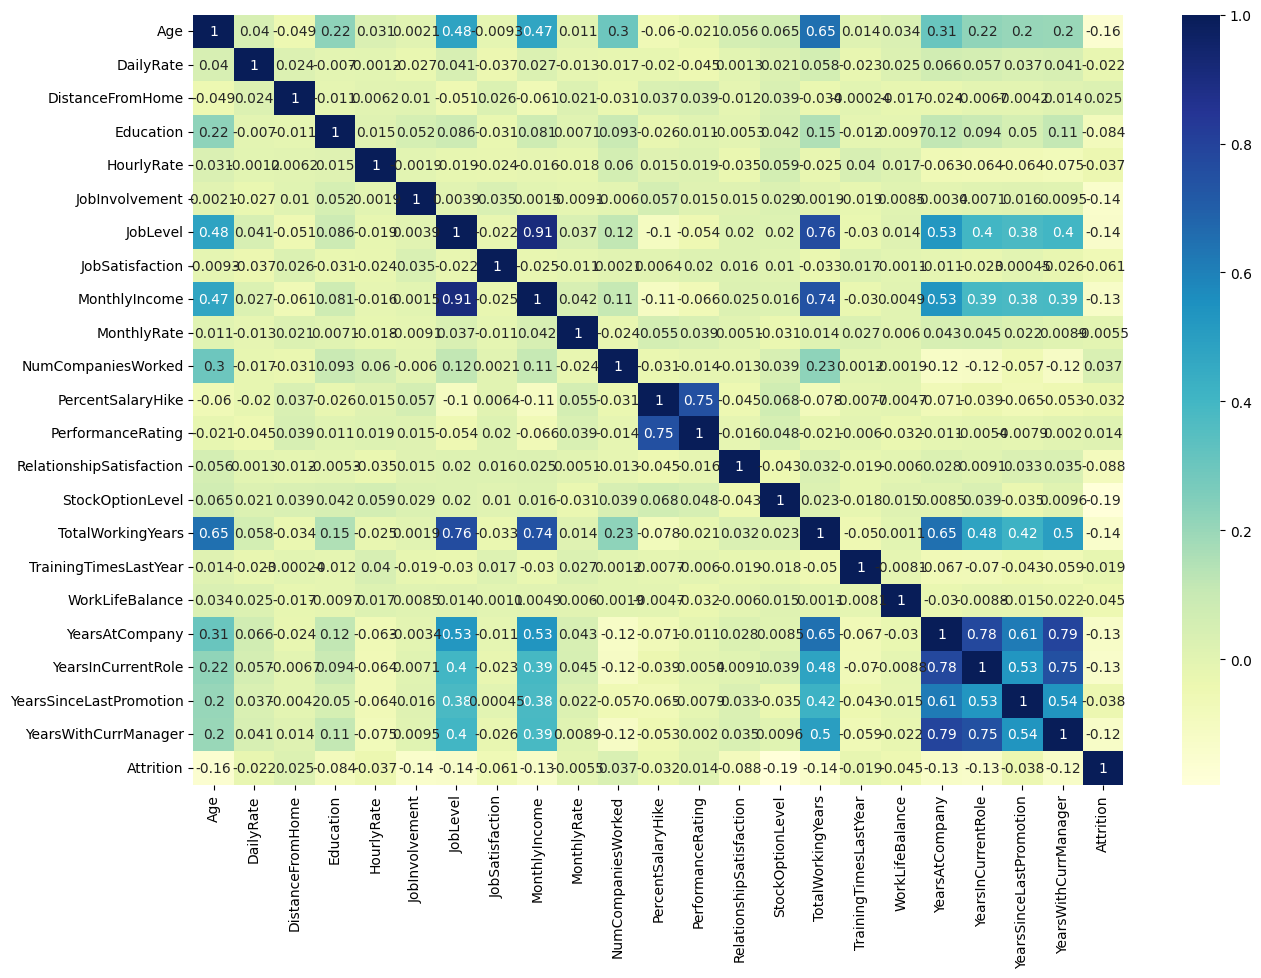

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(nums, cmap='YlGnBu', annot=True)

In [ ]:
"""#

plt.figure(figsize=(15, 15))
for i in range(0, len(categorical)):
    plt.subplot(8, 3, i+1)
    sns.countplot(y=train[categorical[i]], orient='h')
    plt.tight_layout()"""

"#\n\nplt.figure(figsize=(15, 15))\nfor i in range(0, len(categorical)):\n    plt.subplot(8, 3, i+1)\n    sns.countplot(y=train[categorical[i]], orient='h')\n    plt.tight_layout()"

In [ ]:
"""plt.figure(figsize=(15, 15))

for i in range(0, len(categorical)):
    plt.subplot(5, 2, i+1)
    sns.countplot(y=train[categorical[i]])
    plt.tight_layout()"""

'plt.figure(figsize=(15, 15))\n\nfor i in range(0, len(categorical)):\n    plt.subplot(5, 2, i+1)\n    sns.countplot(y=train[categorical[i]])\n    plt.tight_layout()'

In [ ]:
"""plt.figure(figsize=(15, 15))

for i in range(0, len(numerical)):
    plt.subplot(8, 3, i+1)
    sns.boxplot(x=train[numerical[i]])
    plt.tight_layout()"""

'plt.figure(figsize=(15, 15))\n\nfor i in range(0, len(numerical)):\n    plt.subplot(8, 3, i+1)\n    sns.boxplot(x=train[numerical[i]])\n    plt.tight_layout()'

In [17]:
# to remove this line

grp = train.groupby("Age")["MonthlyIncome"].mean()
grp

Age
18     1942.666667
19     2186.769231
20     4282.000000
21     2804.937500
22     2648.785714
23     3699.850000
24     3813.782609
25     4314.111111
26     3819.466667
27     4489.134328
28     3360.080645
29     4162.416667
30     5462.606061
31     4813.588889
32     5454.100000
33     5423.240000
34     5110.536842
35     5095.550562
36     5625.960396
37     6005.431034
38     5564.045455
39     7244.277778
40     7630.708861
41     7927.325000
42     9463.805556
43     7925.793103
44     6541.820513
45     8921.195122
46    10462.702128
47     8452.000000
48     8303.178571
49     7800.842105
50    12852.586207
51    10251.857143
52    12117.611111
53    13925.066667
54    10426.571429
55    12347.235294
56     6030.700000
57     4984.500000
58     9484.111111
59    11246.100000
60    10435.333333
Name: MonthlyIncome, dtype: float64

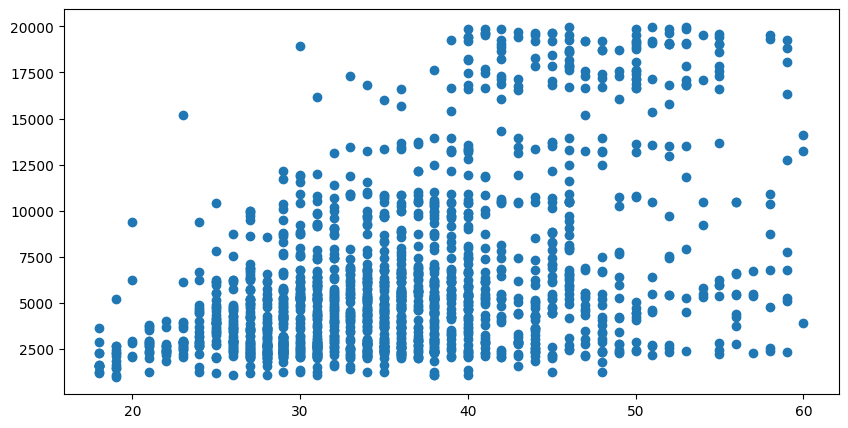

In [21]:
plt.figure(figsize=(10, 5))
#grp.plot(kind='bar', color='red')
plt.scatter(x=train["Age"], y=train["MonthlyIncome"])

<Axes: xlabel='Age'>

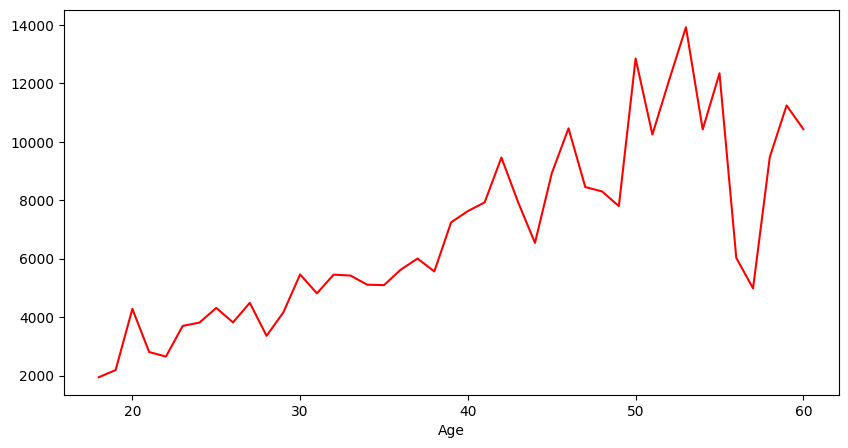

In [20]:
drf = train.groupby("Age")["MonthlyIncome"].mean()

plt.figure(figsize=(10, 5))
grp.plot(kind='line', color='red')
#plt.scatter(x=train["Age"], y=train["JobLevel"])
pl

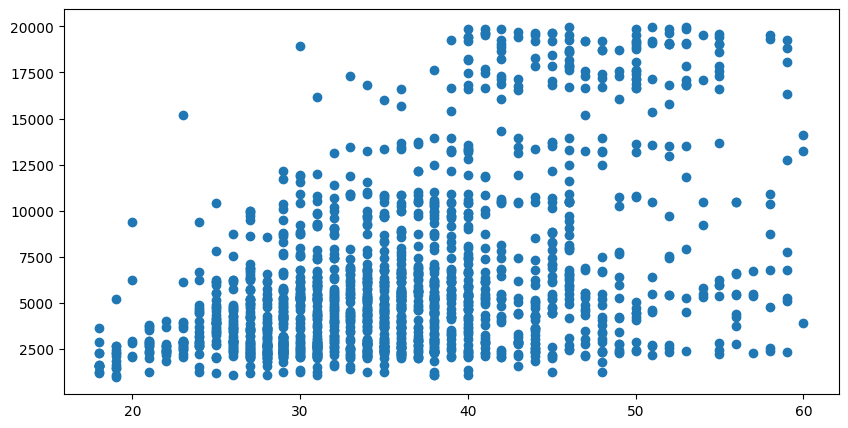

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(x=train['Age'], y=train['MonthlyIncome'])
plt.show();

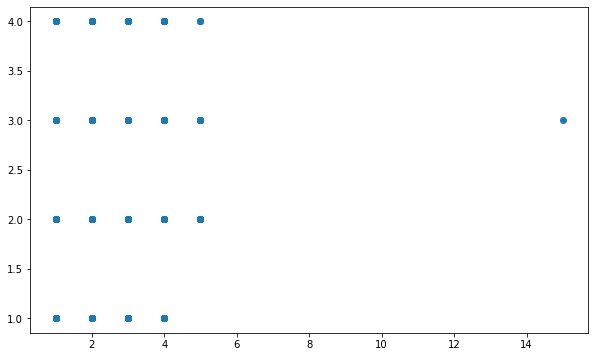

In [ ]:
plt.figure(figsize=(10, 6))
rp = train.groupby('Education')['WorkLifeBalance'].mean()
#rp.plot(kind='bar', color='red')
plt.scatter(x=train["Education"], y=train["WorkLifeBalance"])

<AxesSubplot:ylabel='EducationField'>

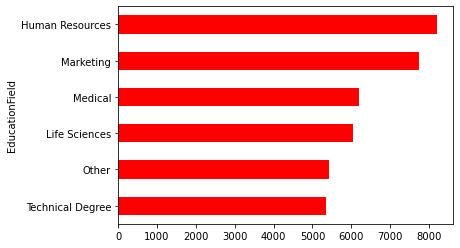

In [ ]:
# Average income ammong the various professions

train.groupby("EducationField")["MonthlyIncome"].mean().sort_values().plot(kind='barh', color="red")

<AxesSubplot:ylabel='Gender'>

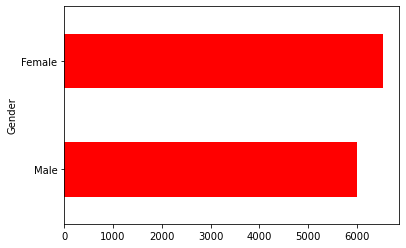

In [ ]:
train.groupby("Gender")["MonthlyIncome"].mean().sort_values().plot(kind='barh', color="red")

<AxesSubplot:ylabel='Gender'>

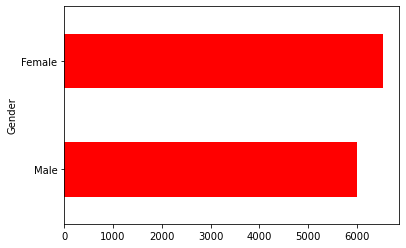

In [ ]:
train.groupby("Gender")["MonthlyIncome"].mean().sort_values().plot(kind='barh', color="red")

In [ ]:
train.groupby("Gender")["WorkLifeBalance", "MonthlyIncome"].mean()

,WorkLifeBalance,MonthlyIncome
Gender,,
Female,2.747145,6540.561175
Male,2.782895,5997.566729


<AxesSubplot:xlabel='WorkLifeBalance'>

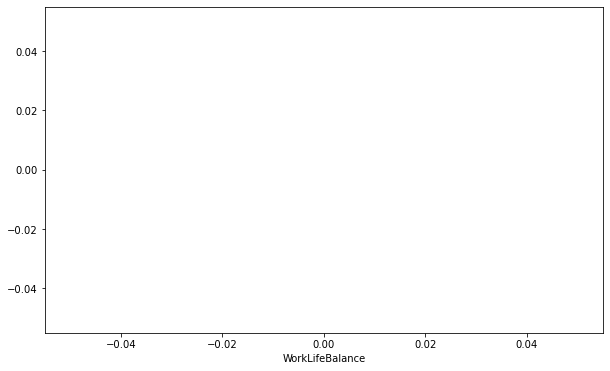

In [ ]:
plt.figure(figsize=(10, 6))
tf = train.groupby("Age")["WorkLifeBalance"].mean()
sns.scatterplot(tf)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

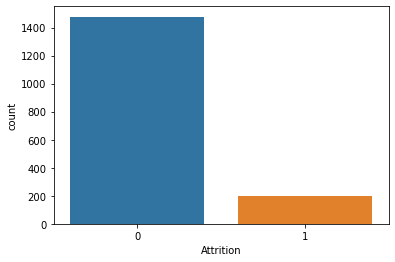

In [ ]:
sns.countplot(train["Attrition"])

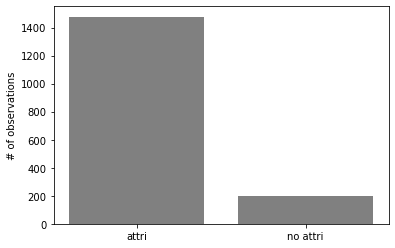

In [ ]:
# Separate minority and majority classes
no_attri = train[train["Attrition"]==0]
attri = train[train["Attrition"]==1]

# Get all possible labels
labels = train['Attrition'].unique()
heights = [len(no_attri), len(attri)]
plt.bar(labels,heights,color='grey')
plt.xticks(labels,['attri','no attri'])
plt.ylabel("# of observations")
plt.show()

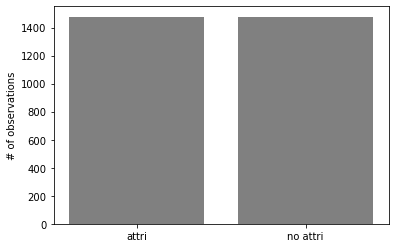

In [ ]:
# Assuming no_attri and attri are DataFrames containing different classes
# Upsample the minority class to match the number of samples in the majority class
attri_upsampled = resample(attri, replace=True, n_samples=len(no_attri), random_state=42)

# Combine the upsampled minority class with the majority class
upsampled_data = pd.concat([no_attri, attri_upsampled])

# Display the count plot after upsampling
labels_upsampled = upsampled_data['Attrition'].unique()
heights_upsampled = [len(upsampled_data[upsampled_data["Attrition"]==0]), len(upsampled_data[upsampled_data["Attrition"]==1])]
plt.bar(labels_upsampled, heights_upsampled, color='grey')
plt.xticks(labels_upsampled, ['attri', 'no attri'])
plt.ylabel("# of observations")
plt.show()


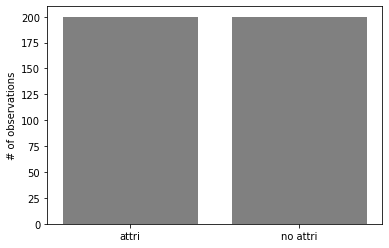

In [ ]:
# Separate majority and minority classes
no_attri = train[train["Attrition"]==0]
attri = train[train["Attrition"]==1]

# Downsample the majority class ('no_attri') to match the number of instances in 'attri'
no_attri_downsampled = resample(no_attri, 
                                replace=False,  # Sample without replacement
                                n_samples=len(attri),  # Match the number of instances in 'attri'
                                random_state=42)  # Set a random state for reproducibility

# Combine the downsampled majority class with the minority class
downsampled_data = pd.concat([no_attri_downsampled, attri])

# Plotting the count of 'Attrition' after downsampling
labels = downsampled_data['Attrition'].unique()
heights = downsampled_data['Attrition'].value_counts().tolist()
plt.bar(labels, heights, color='grey')
plt.xticks(labels, ['attri', 'no attri'])
plt.ylabel("# of observations")
plt.show()

# Your 'downsampled_data' DataFrame now contains the downsampled dataset


In [ ]:
upsampled_data = train

In [ ]:
# defining a function that encodes categorical variables using using Label_encoder

def encode(train, col):
    
    lab = LabelEncoder()
    
    for i in col:
        train[i] = lab.fit_transform(train[i])
    
    return train
    

In [ ]:
# Apply label encoding to Categorical variables
train = encode(train, categorical)

In [ ]:
X = train.drop("Attrition", axis=1)
y = train["Attrition"]

In [ ]:
# scaling t

scale = StandardScaler()
X = scale.fit_transform(X)

Text(0, 0.5, 'Cumulative explained variance')

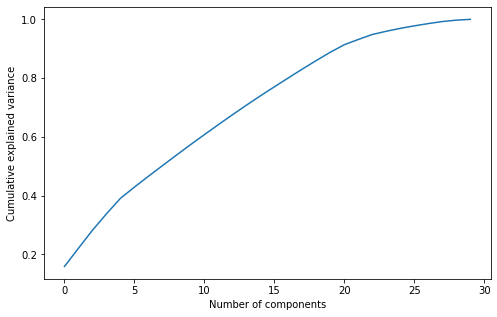

In [ ]:
pca = PCA()

plt.figure(figsize=(8, 5))

pc = pca.fit_transform(X)
pca_train = pd.DataFrame(data = pc)


# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
pca_85 = PCA(.80)
pca_85.fit_transform(X)
print(round(pca_85.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",  pca_85.n_components_, "components")

80.1 % of variance explained by 17 components


In [ ]:
pca_85.explained_variance_[:4]

array([4.76408893, 1.86262281, 1.83926213, 1.67780197])

In [ ]:
# data splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=11)

In [ ]:
#X = pca_85.fit_transform(X_train)


In [ ]:
logistic = LogisticRegression()
svm = SVC()
random = RandomForestClassifier(random_state=11)
gradient = GradientBoostingClassifier()
xtratree = ExtraTreesClassifier()
boosting = AdaBoostClassifier()
neural = MLPClassifier()
dtree = DecisionTreeClassifier()
gaussian = GaussianNB()
neighbor = KNeighborsClassifier()

In [ ]:
def model(model):
    logistic = model.fit(X_train, y_train)

    predict = logistic.predict(X_test)
    
    accuracy = metrics.accuracy_score(predict, y_test)
    pre = metrics.roc_auc_score(predict, y_test)
    
    return print (f"Accurarcy: {accuracy} \nROC: {pre}")

In [ ]:
model(logistic)

Accurarcy: 0.8928571428571429 
ROC: 0.728848114169215


In [ ]:
model(random)

Accurarcy: 0.8928571428571429 
ROC: 0.7486404833836858


In [ ]:
model(gradient)

Accurarcy: 0.8869047619047619 
ROC: 0.6866043613707166


In [ ]:
model(boosting)

Accurarcy: 0.8809523809523809 
ROC: 0.6588604093675087


In [ ]:
model(xtratree)

Accurarcy: 0.8898809523809523 
ROC: 0.6984848484848485


In [ ]:
model(neural)

Accurarcy: 0.8630952380952381 
ROC: 0.6133762057877814


In [ ]:
model (dtree)

Accurarcy: 0.8035714285714286 
ROC: 0.5390607101947309


In [ ]:
model(neighbor)

Accurarcy: 0.8720238095238095 
ROC: 0.44393939393939397


In [ ]:
model(gaussian)

Accurarcy: 0.8214285714285714 
ROC: 0.5969040247678018


In [ ]:
from sklearn.model_selection import cross_val_score

def model_with_cv(model, X, y, cv=5):
    scores_accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    scores_roc_auc = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')

    print(f"Mean Accuracy: {scores_accuracy.mean()} \nMean ROC AUC: {scores_roc_auc.mean()}")


In [ ]:
roc = cross_val_score(gradient, X, y, cv=5, scoring='roc_auc').mean()
roc.

0.820356676591846

In [ ]:
# Assuming you have X_train, y_train, X_test, y_test and a model instantiated
# model = YourModelClass()

model_with_cv(dtree, X_train, y_train)


Mean Accuracy: 0.8165372024635188 
Mean ROC AUC: 0.608729940497656


In [ ]:
model_with_cv(logistic, X_train, y_train)

Mean Accuracy: 0.88439771403207 
Mean ROC AUC: 0.7997411695844125


In [ ]:
model_with_cv(random, X_train, y_train)

Mean Accuracy: 0.878446984408811 
Mean ROC AUC: 0.7993736425515523


In [ ]:
model_with_cv(gradient, X_train, y_train)

Mean Accuracy: 0.883656993841203 
Mean ROC AUC: 0.8317858830825383


In [ ]:
model_with_cv(xtratree, X_train, y_train)

Mean Accuracy: 0.8821755534594684 
Mean ROC AUC: 0.8170563516976472


In [ ]:
model_with_cv(boosting, X_train, y_train)

Mean Accuracy: 0.8851550796204849 
Mean ROC AUC: 0.8146035943185916


In [ ]:
model_with_cv(neural, X_train, y_train)

Mean Accuracy: 0.860536536647617 
Mean ROC AUC: 0.7478746113770229


In [ ]:
model_with_cv(gaussian, X_train, y_train)

Mean Accuracy: 0.8418881429284802 
Mean ROC AUC: 0.7590465247953754


In [ ]:
model_with_cv(neighbor, X_train, y_train)

Mean Accuracy: 0.874721189591078 
Mean ROC AUC: 0.6334922111486302


In [ ]:
roc

0.820356676591846

In [ ]:
test = test.drop(["id", "EmployeeCount", "Over18", "StandardHours"], axis=1)

def encode(test, col):
    
    lab = LabelEncoder()
    
    for i in col:
        test[i] = lab.fit_transform(test[i])
    
    return test

test = encode (test, categorical)

test = StandardScaler().fit_transform(test)

In [ ]:
pro = roc.predict(test)
pro

AttributeError: 'numpy.float64' object has no attribute 'predict'

In [ ]:
pred = gradient. predict(X_test)
attrition = metrics.roc_auc_score(pred, y_test)
attrition

In [ ]:
tab = pd.DataFrame({"id": submission["id"], "Attrition": roc})
tab

,id,Attrition
0,1677,0.820357
1,1678,0.820357
2,1679,0.820357
3,1680,0.820357
4,1681,0.820357
...,...,...
1114,2791,0.820357
1115,2792,0.820357
1116,2793,0.820357
1117,2794,0.820357


In [ ]:
sub = tab.to_csv("chippy.csv", index=False)